In [2]:
print('hello world')

hello world


In [3]:
import pytesseract
from PIL import Image
import os


print(os.environ)



img = Image.open("../outs/xshot_0.png")
print(img)

text = pytesseract.image_to_string(img)
print(text)

environ({'ACSETUPSVCPORT': '23210', 'ACSVCPORT': '17532', 'ALLUSERSPROFILE': 'C:\\ProgramData', 'APPDATA': 'C:\\Users\\odz\\AppData\\Roaming', 'CHROME_CRASHPAD_PIPE_NAME': '\\\\.\\pipe\\crashpad_25992_TCZAYXETNUKMCUAI', 'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files', 'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files', 'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files', 'COMPUTERNAME': 'DESKTOP-MROJ326', 'COMSPEC': 'C:\\WINDOWS\\system32\\cmd.exe', 'DRIVERDATA': 'C:\\Windows\\System32\\Drivers\\DriverData', 'EFC_5540_1592913036': '1', 'ELECTRON_RUN_AS_NODE': '1', 'GIT_INSTALL_ROOT': 'C:\\Users\\odz\\scoop\\apps\\git\\current', 'HOMEDRIVE': 'C:', 'HOMEPATH': '\\Users\\odz', 'JPY_INTERRUPT_EVENT': '2456', 'LOCALAPPDATA': 'C:\\Users\\odz\\AppData\\Local', 'LOGONSERVER': '\\\\DESKTOP-MROJ326', 'NUMBER_OF_PROCESSORS': '12', 'ONEDRIVE': 'C:\\Users\\odz\\OneDrive', 'OS': 'Windows_NT', 'PATH': 'c:\\Users\\odz\\projs\\try-ms-automation-python\\.venv\\Scripts;C:\\Use

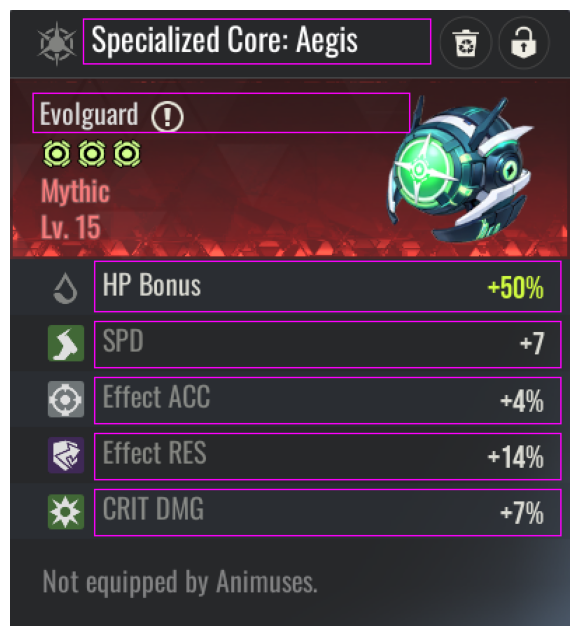

In [33]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread("../outs/xshot_0.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # for matplotlib

SUB_OFFSET_Y = 40
ROI_CONFIG =  {
    "slot":       (52, 6, 300, 38),
    "name":       (16, 59, 285, 87),
    "main_stat":  (60, 179, 393, 215),
    "sub_1":      (60, 222+(SUB_OFFSET_Y*0), 393, 255+(SUB_OFFSET_Y*0)),
    "sub_2":      (60, 222+(SUB_OFFSET_Y*1), 393, 255+(SUB_OFFSET_Y*1)),
    "sub_3":      (60, 222+(SUB_OFFSET_Y*2), 393, 255+(SUB_OFFSET_Y*2)),
    "sub_4":      (60, 222+(SUB_OFFSET_Y*3), 393, 255+(SUB_OFFSET_Y*3)),
}

# Draw ROIs on a copy
img_boxed = img_rgb.copy()
for name, (x1, y1, x2, y2) in ROI_CONFIG.items():
    cv2.rectangle(img_boxed, (x1, y1), (x2, y2), (255, 0, 255), 1) 
    # cv2.putText(img_boxed, name, (x1+10, y1+10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 1)
    

plt.figure(figsize=(12, 8))
plt.imshow(img_boxed)
plt.axis("off")
plt.show()


In [21]:
roi = cv2.selectROI("Select ROI", img)
print(roi)  # x, y, w, h
cv2.destroyWindow("Select ROI")
# NOTE!: press enter or space to exit, X button don't work

(61, 222, 328, 35)


In [36]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Function to OCR a single ROI
def ocr_roi(image, roi, psm=7, whitelist=None):
    x1, y1, x2, y2 = roi
    crop = image[y1:y2, x1:x2]

    config = f"--psm {psm}"
    if whitelist:
        config += f" -c tessedit_char_whitelist={whitelist}"

    text = pytesseract.image_to_string(crop, config=config)
    return text.strip()

# Run OCR for each field
result = {}
for field, roi in ROI_CONFIG.items():
    if field == "example":
        result[field] = ocr_roi(gray, roi, psm=7, whitelist="0123456789")
    else:
        result[field] = ocr_roi(gray, roi, psm=6)  # text block

import json
print(json.dumps(result, indent=4))


{
    "slot": "Specialized Core: Aegis",
    "name": "Evolguard @)",
    "main_stat": "HP Bonus +50%",
    "sub_1": "SPD +7",
    "sub_2": "Effect ACC +4%",
    "sub_3": "Effect RES +14%",
    "sub_4": "CRIT DMG +7\u2122%"
}


In [37]:
# @todo TODO
# matrix count

In [44]:
from pathlib import Path

imgs=[]
modules_img_dir = Path("../outs")
for file_path in modules_img_dir.glob("*.png"):
    if file_path.is_file():
        imgs.append(file_path)
print(len(imgs), imgs)

for img in imgs[:5]:
    print(img)

6000 [WindowsPath('../outs/xshot_0.png'), WindowsPath('../outs/xshot_1.png'), WindowsPath('../outs/xshot_10.png'), WindowsPath('../outs/xshot_100.png'), WindowsPath('../outs/xshot_1000.png'), WindowsPath('../outs/xshot_1001.png'), WindowsPath('../outs/xshot_1002.png'), WindowsPath('../outs/xshot_1003.png'), WindowsPath('../outs/xshot_1004.png'), WindowsPath('../outs/xshot_1005.png'), WindowsPath('../outs/xshot_1006.png'), WindowsPath('../outs/xshot_1007.png'), WindowsPath('../outs/xshot_1008.png'), WindowsPath('../outs/xshot_1009.png'), WindowsPath('../outs/xshot_101.png'), WindowsPath('../outs/xshot_1010.png'), WindowsPath('../outs/xshot_1011.png'), WindowsPath('../outs/xshot_1012.png'), WindowsPath('../outs/xshot_1013.png'), WindowsPath('../outs/xshot_1014.png'), WindowsPath('../outs/xshot_1015.png'), WindowsPath('../outs/xshot_1016.png'), WindowsPath('../outs/xshot_1017.png'), WindowsPath('../outs/xshot_1018.png'), WindowsPath('../outs/xshot_1019.png'), WindowsPath('../outs/xshot_10

In [71]:

values = []
jsonl_file_path = "./modules_data.jsonl" 
with open(jsonl_file_path, 'a', buffering=1) as jsonl_file:
  for img_path in imgs:
    img = cv2.imread(img_path)
    result = {}
    for field, roi in ROI_CONFIG.items():
        result[field] = ocr_roi(img, roi, psm=6)  # text block
    result["__meta"] = {}
    result["__meta"]["path"] = str(img_path)
    values.append(result)
    record = json.dumps(result)
    jsonl_file.write(record+"\n")

# jsonl_file_path = "./modules_data.jsonl" 
# with open(jsonl_file_path, 'a') as jsonl_file:
#    for line in values:
#      record = json.dumps(line)
#      jsonl_file.write(record+"\n")
# 
# print(f"Successfully written to {jsonl_file_path}")


In [72]:
len(values)

6000